In [1]:
import numpy as np

In [2]:
data = np.zeros(50)

In [22]:
data[0]=1

In [8]:
data_mean = data.mean()
data_mean_std = data.std(ddof=1)/np.sqrt(len(data))

In [20]:
from statsmodels.stats.weightstats import _zconfint_generic, _tconfint_generic
from statsmodels.stats.proportion import proportion_confint
from statsmodels.stats.proportion import samplesize_confint_proportion

In [18]:
def my_proportion_confint(count, nobs, alpha=0.05, method='normal'):
    import scipy.stats as sts
    q_ = count * 1. / nobs
    alpha_2 = 0.5 * alpha
    std_ = np.sqrt(q_ * (1 - q_) / nobs)
    dist = sts.norm.isf(alpha / 2.) * std_
    ci_low = q_ - dist
    ci_upp = q_ + dist
    return ci_low, ci_upp

In [19]:
norm_interval = my_proportion_confint(sum(data), len(data), method = 'normal')
norm_interval

(-0.018805307081790987, 0.05880530708179099)

In [11]:
wilson_interval = proportion_confint(sum(data), len(data), method = 'wilson')
wilson_interval

(0.003539259271646236, 0.10495443589637815)

In [21]:
n_samples = int(np.ceil(samplesize_confint_proportion(data.mean(), 0.01)))
n_samples

753

In [23]:
arr = []
means = []
for i in range(1, 50):
    n_samples = int(np.ceil(samplesize_confint_proportion(data.mean(), 0.01)))
    arr.append(n_samples)
    means.append(data.mean())
    data[i] = 1

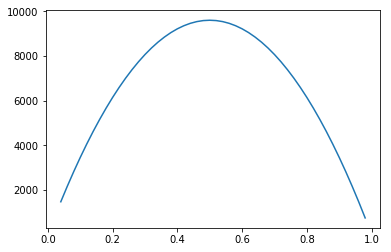

In [25]:
import matplotlib.pyplot as plt
plt.plot(means, arr)
plt.show()

In [27]:
max(arr)

9604